In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
data = pd.read_csv('posneg.csv')

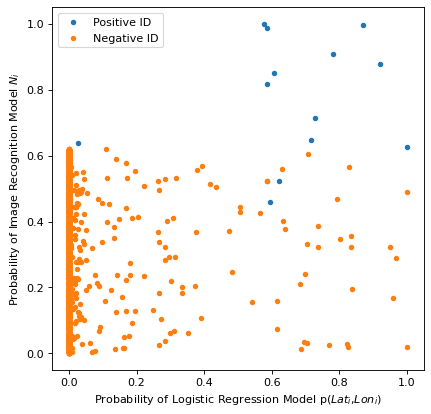

In [3]:
fig = plt.figure(figsize=(6,6),dpi=80)
plt.scatter(data.loc[data['label']==1,'predict'],data.loc[data['label']==1,'imgtrans'],s=15,label='Positive ID')
plt.scatter(data.loc[data['label']==0,'predict'],data.loc[data['label']==0,'imgtrans'],s=15,label='Negative ID')
plt.xlabel('Probability of Logistic Regression Model p($Lat_i$,$Lon_i$)')
plt.ylabel('Probability of Image Recognition Model $N_i$')
plt.legend()

## 进行二次判别

In [4]:
data['intercept'] = 1.0
data['preimg'] = data['predict']*data['imgtrans']
data['pre2'] = data['predict']**2
data['img2'] = data['imgtrans']**2
train_cols = ['predict','imgtrans','intercept']

In [5]:
logit = sm.Logit(data['label'], data[train_cols])
# 拟合模型
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.008430
         Iterations 13


In [6]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 2083
Model:                          Logit   Df Residuals:                     2080
Method:                           MLE   Df Model:                            2
Date:                Sun, 10 Oct 2021   Pseudo R-squ.:                  0.7909
Time:                        10:56:34   Log-Likelihood:                -17.560
converged:                       True   LL-Null:                       -83.988
Covariance Type:            nonrobust   LLR p-value:                 1.416e-29
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
predict        7.5035      1.437      5.220      0.000       4.686      10.321
imgtrans      20.4062      7.077      2.883      0.004       6.536      34.277
intercept    -17.3461      4.159     -4.171      0.0

In [7]:
data['class_pre'] = result.predict(data[train_cols])

In [8]:
r_pos = 0
r_neg = 0
for value in data.values:
    # 预测分数 predict, 是数据中的最后一列
    predict = value[-1]
    # 实际录取结果
    label = value[10]
 
    # 假定预测概率大于0.5则表示预测被录取
    if (predict > 0.9) and (label == 1):
        r_pos += 1
    # 表示预测命中
    if (predict <= 0.9) and (label == 0):
        r_neg += 1

In [9]:
neg_data = data[data['label']==0]
pos_data = data[data['label']==1]
error = data[((data['label']==1) & (data['class_pre']<=0.9)) | ((data['label']==0) & (data['class_pre']>0.9))]

Text(0, 0.5, 'Longitude (After Standardization)')

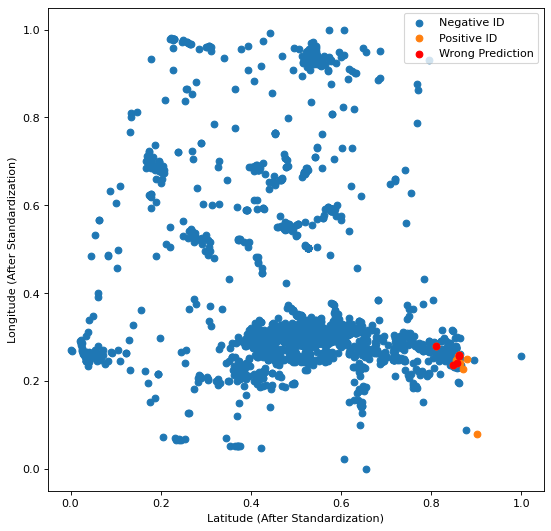

In [10]:
fig = plt.figure(figsize=(8,8),dpi=80)
plt.scatter(neg_data['Latitude'],neg_data['Longitude'],label='Negative ID')
plt.scatter(pos_data['Latitude'],pos_data['Longitude'],label='Positive ID')
plt.scatter(error['Latitude'],error['Longitude'],label='Wrong Prediction',c='r')
plt.legend(loc='upper right')
plt.xlabel('Latitude (After Standardization)')
plt.ylabel('Longitude (After Standardization)')

Text(0, 0.5, 'Probability of Image Recognition Model $N_i$')

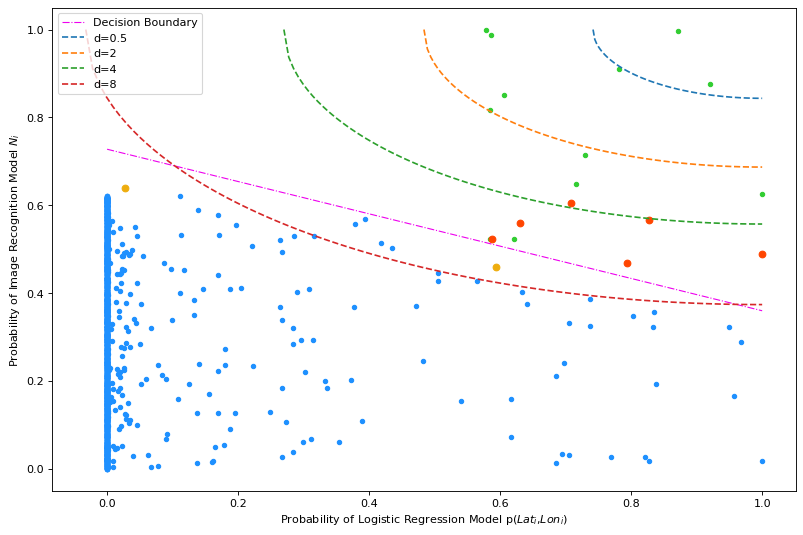

In [11]:
p0 = 0.09
fig = plt.figure(figsize=(12,8),dpi=80)
plt.scatter(pos_data.loc[pos_data['class_pre']>=p0,'predict'],
            pos_data.loc[pos_data['class_pre']>=p0,'imgtrans'],c='#32CD32',s=15)
plt.scatter(neg_data.loc[neg_data['class_pre']<p0,'predict'],
            neg_data.loc[neg_data['class_pre']<p0,'imgtrans'],c='#1E90FF',s=15)
plt.scatter(neg_data.loc[neg_data['class_pre']>=p0,'predict'],
            neg_data.loc[neg_data['class_pre']>=p0,'imgtrans'],c='#FF4500')
plt.scatter(pos_data.loc[pos_data['class_pre']<p0,'predict'],
            pos_data.loc[pos_data['class_pre']<p0,'imgtrans'],c='#EEAD0E')
x = np.linspace(0,1,100)
plt.plot(x,(-7.5035*x+14.8461)/20.4062,lw=1,c='#EE00EE',ls='-.',label='Decision Boundary')
d = 0.5
x = np.linspace(1 - np.sqrt(d/7.5035),1,100)
plt.plot(x,1 - np.sqrt((d - 7.5035*(x-1)**2)/20.4062) ,ls='--',label='d=0.5')
d = 2
x = np.linspace(1 - np.sqrt(d/7.5035),1,100)
plt.plot(x,1 - np.sqrt((d - 7.5035*(x-1)**2)/20.4062) ,ls='--',label='d=2')
d = 4
x = np.linspace(1 - np.sqrt(d/7.5035),1,100)
plt.plot(x,1 - np.sqrt((d - 7.5035*(x-1)**2)/20.4062) ,ls='--',label='d=4')
d = 8
x = np.linspace(1 - np.sqrt(d/7.5035),1,100)
plt.plot(x,1 - np.sqrt((d - 7.5035*(x-1)**2)/20.4062) ,ls='--',label='d=8')
plt.legend(loc='upper left')
plt.xlabel('Probability of Logistic Regression Model p($Lat_i$,$Lon_i$)')
plt.ylabel('Probability of Image Recognition Model $N_i$')